### Quantum Teleportation

Quantum teleportation is a technique for
transferring quantum information from a sender at
one location to a receiver some distance away.

Consider the scenario,where Alice wants to
share the state of the qubit to Bob.

The following diagram illustrates the quantum teleportation flowchart from a high-level perspective.
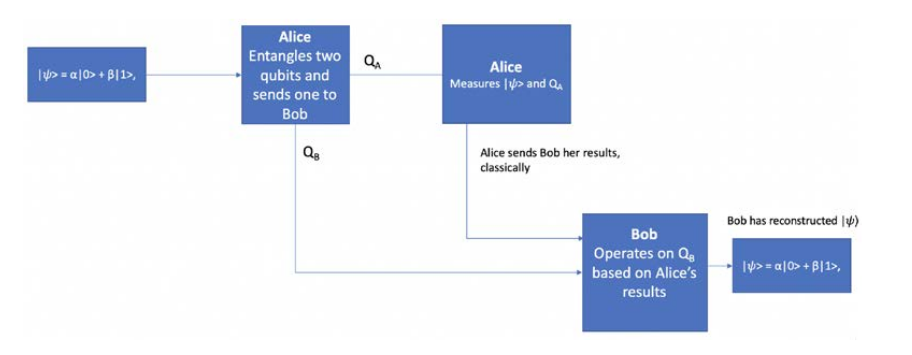
source:Learn Quantum Computing with Python and IBM Quantum Experience


<h6>Importing</h6>

In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

/tmp/ipykernel_7015/1920661497.py:7: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification import marginal_counts


<h6>Creating the Circuit</h6>

for this we need :
<br></br>3 qubits:
<br></br>the first qubit will represent the unkown state
<br></br>the second and the third qubits will represent the 2 qubits shared between Alice and Bob 
<br></br>2 classical bits 

In [2]:
qr=QuantumRegister(3,name='q')#3 qubits
crz=ClassicalRegister(1,name='crz')#2classical bits 
crx= ClassicalRegister(1,name='crx')#in 2 registers 
Teleportation_circuit = QuantumCircuit(qr,crz,crx)




<h6>-Step 1</h6>
<br></br>The first setp is to entangles two qubits q1 and q2.

Where q1 belongs to Alice and q2 belongs to Bob

In [3]:
#Create BellPair
Teleportation_circuit.h(1)
Teleportation_circuit.cx(1,2)
Teleportation_circuit.draw()



q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

<h6>-Step 2</h6>

Now, we'll move to entangle the qubit in the unkown state 
 with qubit of Alice q1

In [4]:
Teleportation_circuit.barrier()
Teleportation_circuit.cx(0, 1)
Teleportation_circuit.h(0)
Teleportation_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

<h6><h6>-Step 3</h6></h6>

Alice applies a measurement to both qubits that she owns, q1 and |ψ⟩, 

and stores this result in two classical bits. She then sends the results to Bob.

In [5]:
Teleportation_circuit.barrier()
Teleportation_circuit.measure(0,0)
Teleportation_circuit.measure(1,1)
Teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐   
  q_0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
  q_2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
                                     ║ 
crx: 1/══════════════════════════════╩═
                                     0


<h6>-Step 4</h6>

Bob who have q2, receives the classical response from Alice and based on it, he will applies the following gates:

00 →Do nothing

01 →Apply X gate

10 →Apply Z gate

11 →Apply ZX gate

In [6]:
Teleportation_circuit.barrier()
Teleportation_circuit.x(2).c_if(crx, 1) 
Teleportation_circuit.z(2).c_if(crz, 1)
Teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐    ░               
  q_0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════╩════╡ 0x1 ╞═══════
                                     0    └─────┘

<h6>Test the Protocol on a Quantum Computer</h6>

 we will initialize Alice's qubit in a state $$|ψ⟩=\frac{1}{\sqrt{5}}|0⟩+\frac{1}{\sqrt{5}}|1⟩$$(psi). This state will be created rotation gate Ry with an angle 2.213rd  on |q0⟩


In [10]:
# Let's do an Ry-gate on a |0> qubit to see how it looks like 
qc1 = QuantumCircuit(1)
qc1.ry(2.213, 0)
qc1.draw()

┌───────────┐
q: ┤ Ry(2.213) ├
   └───────────┘

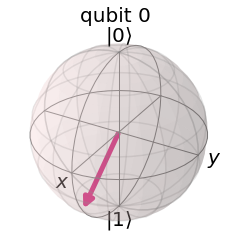

In [11]:
# Let's see the result
qc1.save_statevector()
qobj = assemble(qc1)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

The above state is the sate to be  teleportated from q0 to q2

Now let's create the complete Teleportation circuit of this state

In [7]:

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

#initialize the q0
qc.ry(2.213, 0)
qc.barrier()

## STEP 1: entangling q1 and q2
qc.h(1)
qc.cx(1,2)
qc.barrier()

## STEP 2: #entangle the qubit q0 and q1
qc.cx(0,1)
qc.h(0)
qc.barrier()

## STEP 3:#measure and send
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()# Create random 1-qubit state

## STEP 4
# Bob decodes qubits
qc.x(2).c_if(crx, 1) 
qc.z(2).c_if(crz, 1)
qc.draw()

┌───────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░               
  q_0: ┤ Ry(2.213) ├─░────────────░───■──┤ H ├─░─┤M├────░───────────────
       └───────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ──────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
                     ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ──────────────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
                     ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════════════════════╩════╡ 0x1 ╞═══════
                                                     0    └─────┘

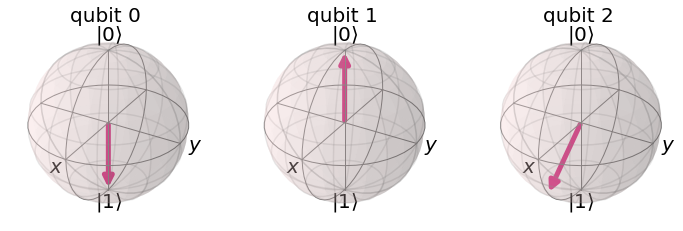

In [8]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

As you can see using the aer simulator, the state of |q2⟩ is the same as the state |ψ⟩ we created above, while the states of |q0⟩ and |q1⟩ collapsed to either |0⟩ or |1⟩. The state |ψ⟩ has been succesufully teleported from qubit 0 to qubit 2.